In [19]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = "../data/raw"
files = os.listdir(path)[:3]

dfs = []
for file in files:
    df = pd.read_csv(f"{path}/{file}")
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

In [9]:
df.head(5)

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,price,district,street,house_number,underground,residential_complex
0,Оптима МСК,official_representative,https://www.cian.ru/sale/flat/316873095/,Москва,sale,flat,4,4,3,107.0,-1,0,72760000,Мещанский,Олимпийский проспект,12,Цветной бульвар,Sole Hills
1,GRAND ESTATE - Премиальная недвижимость,real_estate_agent,https://www.cian.ru/sale/flat/309170499/,Москва,sale,flat,5,5,3,152.0,-1,0,103000000,Красносельский,переулок Даев,31С2,Сухаревская,NaN
2,Intermark Real Estate,real_estate_agent,https://www.cian.ru/sale/flat/309810361/,Москва,sale,flat,5,5,3,151.6,-1,0,103000000,Красносельский,переулок Даев,31С2,Сухаревская,NaN
3,BARNES International Realty,real_estate_agent,https://www.cian.ru/sale/flat/315288286/,Москва,sale,flat,3,4,3,124.0,-1,0,130000000,Тверской,Петровка,28,Чеховская,NaN
4,Beri,real_estate_agent,https://www.cian.ru/sale/flat/311737958/,Москва,sale,flat,6,7,3,90.4,-1,0,90400000,Арбат,Трубниковский переулок,26С1,Смоленская,NaN


In [10]:
df.describe()

,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,price
count,401.000000,401.000000,401.000000,401.000000,401.0,401.0,4.010000e+02
mean,9.446384,18.738155,2.000000,67.925137,-1.0,0.0,5.974601e+07
std,9.792995,16.086757,0.809321,34.277508,0.0,0.0,8.158359e+07
min,1.000000,3.000000,1.000000,10.700000,-1.0,0.0,3.200000e+06
25%,3.000000,9.000000,1.000000,41.000000,-1.0,0.0,1.380000e+07
50%,7.000000,13.000000,2.000000,60.000000,-1.0,0.0,3.090000e+07
75%,12.000000,23.000000,3.000000,84.000000,-1.0,0.0,7.500000e+07
max,79.000000,95.000000,3.000000,191.500000,-1.0,0.0,6.300000e+08


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   author               401 non-null    object 
 1   author_type          401 non-null    object 
 2   url                  401 non-null    object 
 3   location             401 non-null    object 
 4   deal_type            401 non-null    object 
 5   accommodation_type   401 non-null    object 
 6   floor                401 non-null    int64  
 7   floors_count         401 non-null    int64  
 8   rooms_count          401 non-null    int64  
 9   total_meters         401 non-null    float64
 10  price_per_month      401 non-null    int64  
 11  commissions          401 non-null    int64  
 12  price                401 non-null    int64  
 13  district             380 non-null    object 
 14  street               396 non-null    object 
 15  house_number         396 non-null    obj

Удалим константные столбцы, и столбцы содержащие все уникальные значениям (url):

In [12]:
df.drop(['location', 'deal_type', 'accommodation_type', 'price_per_month', 'commissions', 'url'], axis=1, inplace=True)

Удалим столбцы-имена собственные:

In [14]:
df.drop(['author', 'author_type', 'residential_complex'], axis=1, inplace=True)

Посмотрим пропуски

In [13]:
df.isna().sum()

author                   0
author_type              0
floor                    0
floors_count             0
rooms_count              0
total_meters             0
price                    0
district                21
street                   5
house_number             5
underground              3
residential_complex    183
dtype: int64

In [15]:
df.head(5)

,floor,floors_count,rooms_count,total_meters,price,district,street,house_number,underground
0,4,4,3,107.0,72760000,Мещанский,Олимпийский проспект,12,Цветной бульвар
1,5,5,3,152.0,103000000,Красносельский,переулок Даев,31С2,Сухаревская
2,5,5,3,151.6,103000000,Красносельский,переулок Даев,31С2,Сухаревская
3,3,4,3,124.0,130000000,Тверской,Петровка,28,Чеховская
4,6,7,3,90.4,90400000,Арбат,Трубниковский переулок,26С1,Смоленская


In [28]:
df['rooms_count'].value_counts()

rooms_count
2    139
3    131
1    131
Name: count, dtype: int64

In [ ]:
cols = ["floor",	"floors_count",	"total_meters"]

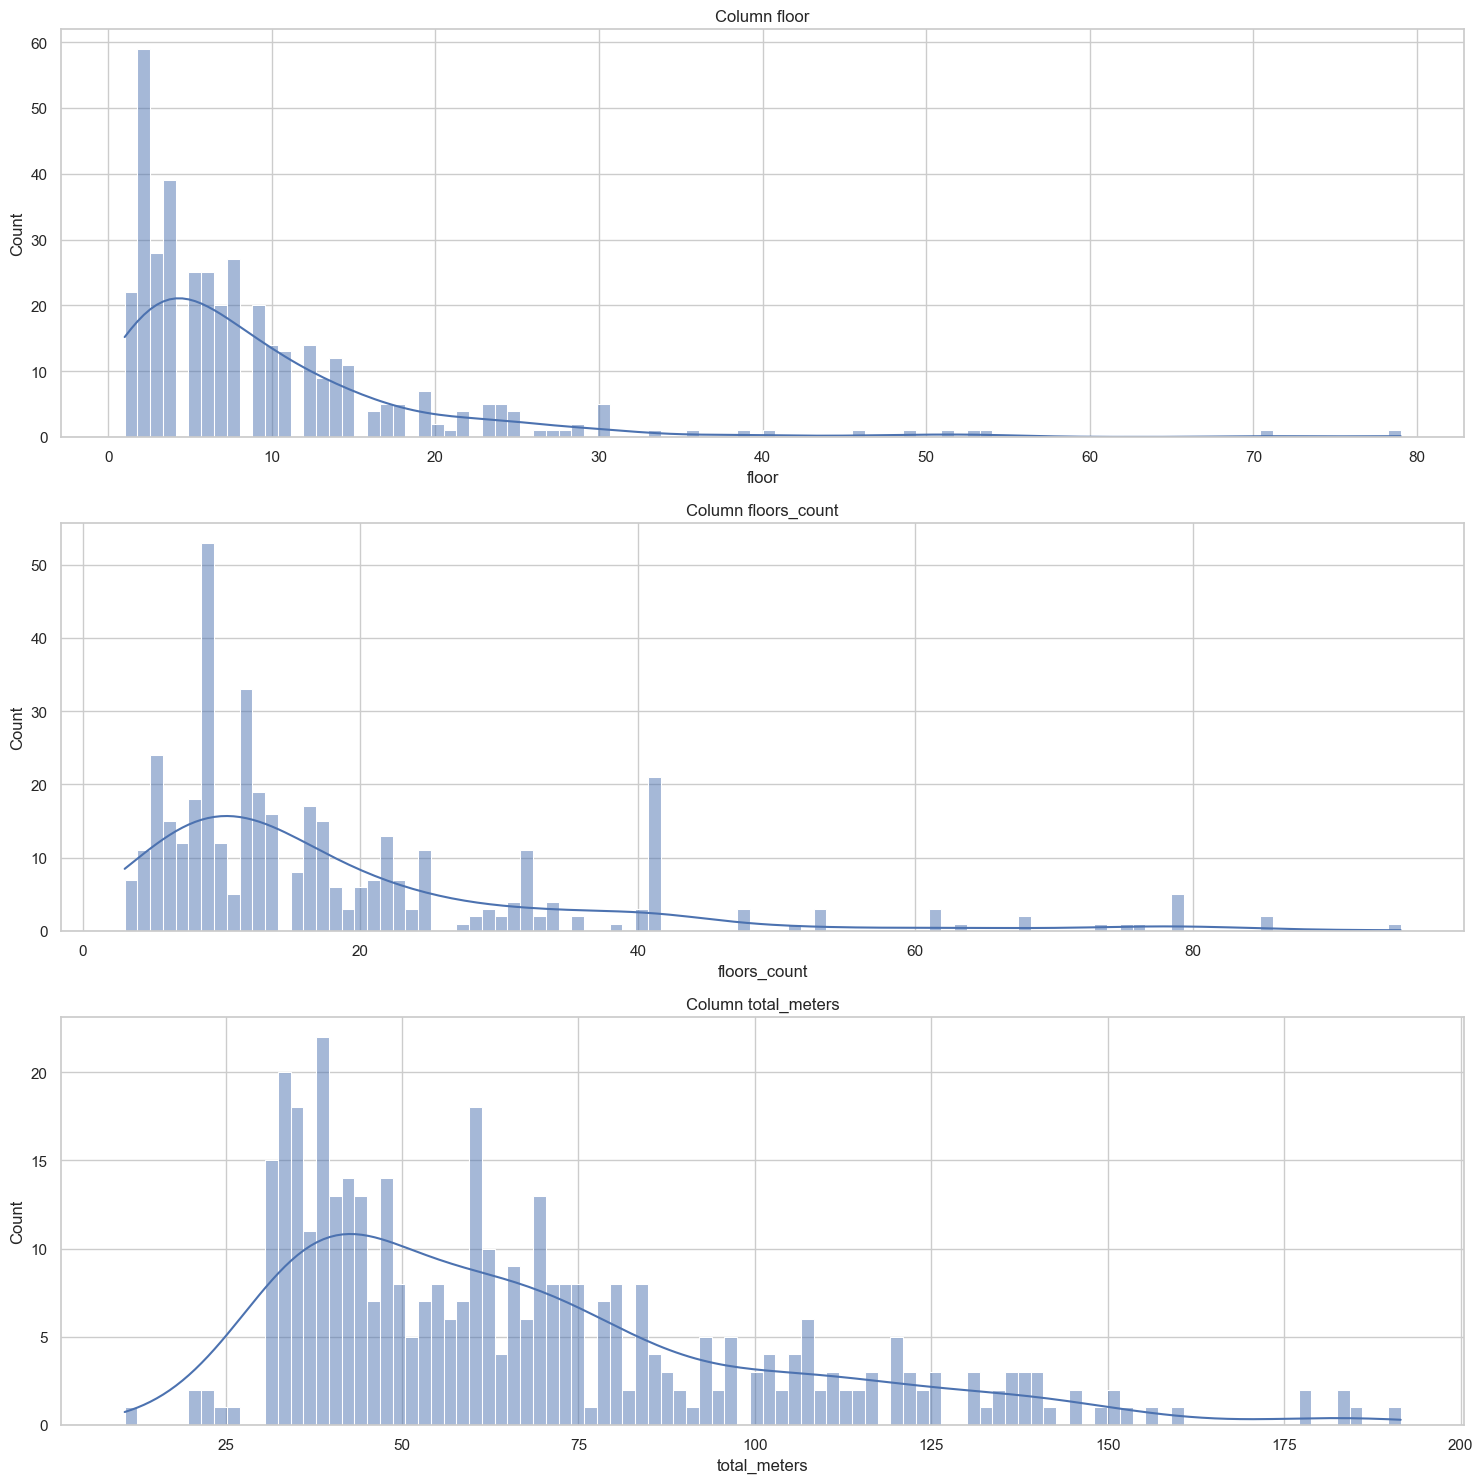

In [ ]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

for i, col in zip(range(3), cols):
    sns.histplot(data=df[col], ax=axes[i], kde=True, bins=100)
    axes[i].set_title(f"Column {col}")

plt.tight_layout()
plt.show()


In [27]:
def remove_outliers_iqr(df, column, threshold=1.5):
    """
    Удаляет выбросы из указанного столбца DataFrame с помощью метода IQR.

    Параметры:
    - df: Исходный DataFrame.
    - column: Название столбца для обработки.
    - threshold: Коэффициент для определения границ выбросов (обычно 1.5).

    Возвращает:
    - DataFrame без выбросов в указанном столбце.
    """
    if column not in df.columns:
        raise ValueError(f"Столбец '{column}' не найден в DataFrame.")

    # Вычисляем квартили и IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Определяем границы выбросов
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Фильтруем DataFrame
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return filtered_df.reset_index(drop=True)

In [32]:
for col in cols:
    df = remove_outliers_iqr(df, col)

In [33]:
df['rooms_count'].value_counts()

rooms_count
2    118
3    114
1    113
Name: count, dtype: int64

In [35]:
cols.append("rooms_count")

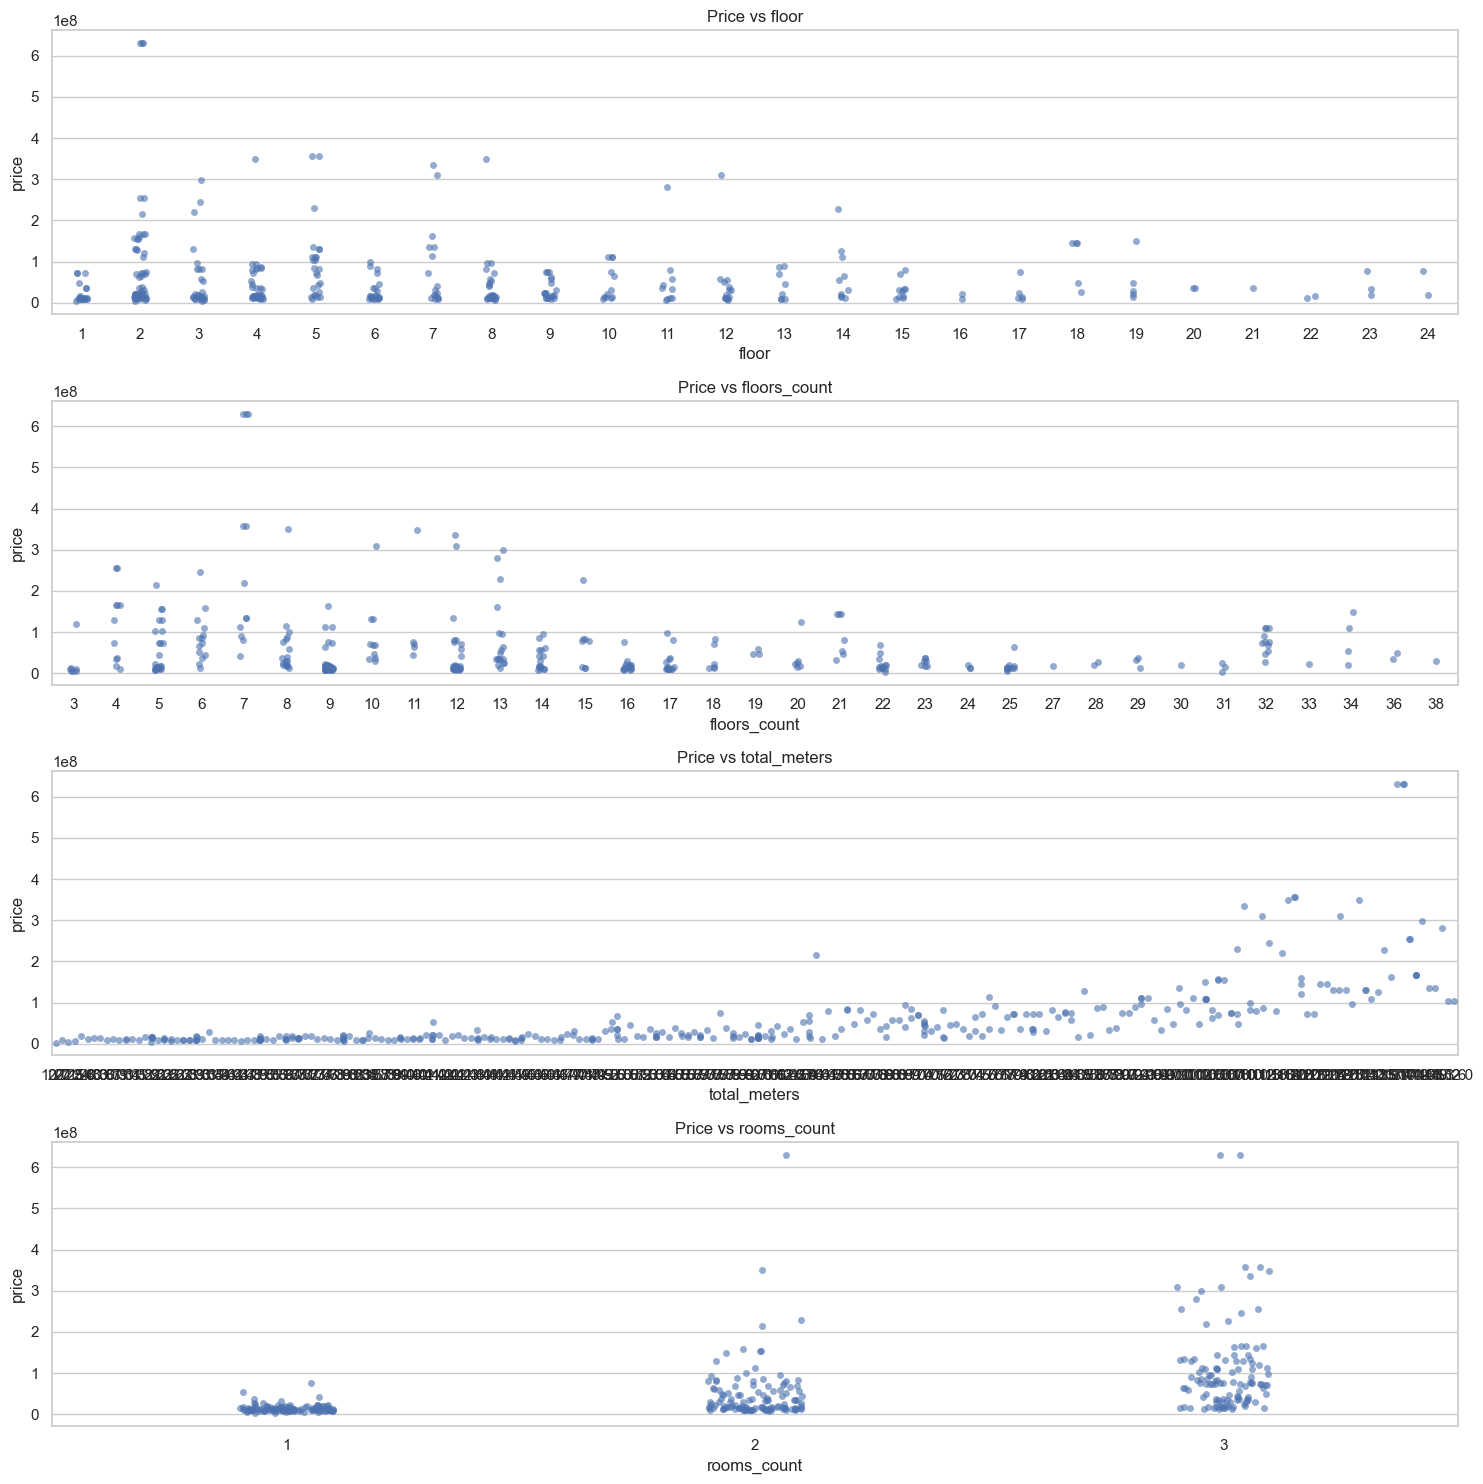

In [37]:
fig, axes = plt.subplots(len(cols), 1, figsize=(15, 15))

for i, feature in enumerate(cols):
    ax = axes[i]
    sns.stripplot(data=df, x=feature, y="price", ax=ax, alpha=0.6)
    ax.set_title(f'Price vs {feature}')

plt.tight_layout()
plt.show()

In [39]:
df.to_csv("../data/processed/clean_flat_data.csv")